### Visualizing interesting connections in the whole dataframe


In [1]:
import json
import pandas as pd
import os
from textblob import TextBlob
import nltk
import tweepy
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
print(os.getcwd())

/home/alibor/code/reichardtma/prestweets/notebooks


In [3]:
boris = pd.read_csv('borisjohnson_tweets.csv')
jokowi = pd.read_csv('jokowi_tweets.csv')
jokowi['content'] = jokowi['Translation']
jokowi = jokowi.drop(columns= ['Translation'])
jb = pd.read_csv('jairbolsonaro_tweets.csv')
jb['content'] = jb['Translation']
jb = jb.drop(columns= ['Translation'])
macron = pd.read_csv('EmmanuelMacron_tweets.csv')
macron['content'] = macron['Translation']
macron = macron.drop(columns= ['Translation'])
cr = pd.read_csv('CyrilRamaphosa_tweets.csv')

In [4]:
presis = [boris,jokowi,jb,macron,cr]
presis_name = ['boris','jokowi','jb','macron','cr']
for i in range(5):
    presis[i]['Unnamed: 0'] = presis_name[i]

In [5]:
jokowi.head()

,Unnamed: 0,id,url,date,content,hashtags,cashtags,media,lang
0,jokowi,1506625755173642247,https://twitter.com/jokowi/status/150662575517...,2022-03-23 13:35:46+00:00,The situation of the Covid-19 pandemic in Indo...,NaN,NaN,NaN,in
1,jokowi,1506620313672380417,https://twitter.com/jokowi/status/150662031367...,2022-03-23 13:14:09+00:00,I'm heading to East Nusa Tenggara tonight for ...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Photo', '...",in
2,jokowi,1506547045179351045,https://twitter.com/jokowi/status/150654704517...,2022-03-23 08:23:00+00:00,Today I received the general chairmen of 12 st...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Photo', '...",in
3,jokowi,1506520169694187520,https://twitter.com/jokowi/status/150652016969...,2022-03-23 06:36:12+00:00,One of the largest handicraft product exhibiti...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Photo', '...",in
4,jokowi,1506520163289423872,https://twitter.com/jokowi/status/150652016328...,2022-03-23 06:36:11+00:00,"Two years of vacuum due to the pandemic, INACR...",NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Photo', '...",in


In [6]:
pres = pd.concat([boris,jokowi,jb,macron,cr], axis=0)

In [7]:
pres = pres.rename(columns={"Unnamed: 0": "name"})

In [8]:
pres.content.describe()

count           39241
unique          39101
top       @secomvc 🇧🇷
freq                8
Name: content, dtype: object

In [9]:
def remove_punctuation(text):
    text = ''.join([i for i in text if i not in string.punctuation])
    return text
def lower_case(text):
    text = text.lower()
    return text
def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    text = ''.join(lemmatizer.lemmatize(word) for word in text)
    return text
def stop_words(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    text = ' '.join(w for w in word_tokens if not w in stop_words)
    return text

pres = pres[pres.content.map(lambda x: isinstance(x,str))]
    
pres['clean_translation'] = pres['content'].apply(lemmatize).\
apply(lower_case).apply(remove_numbers).apply(remove_punctuation).apply(stop_words)
pres.head()

,name,id,url,date,content,hashtags,cashtags,media,lang,clean_translation
0,boris,1506711585468911621,https://twitter.com/BorisJohnson/status/150671...,2022-03-23 19:16:49+00:00,In 2019 I promised to equalise National Insura...,['SpringStatement2022'],NaN,NaN,en,promised equalise national insurance income ta...
1,boris,1506684769559621633,https://twitter.com/BorisJohnson/status/150668...,2022-03-23 17:30:16+00:00,I spoke to President @ZelenskyyUa and reiterat...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Photo', '...",en,spoke president zelenskyyua reiterated uk ’ ho...
2,boris,1506675316273692678,https://twitter.com/BorisJohnson/status/150667...,2022-03-23 16:52:42+00:00,Those lost to Covid will never be out of our h...,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Photo', '...",en,lost covid never hearts minds today reflect na...
3,boris,1506647014209200130,https://twitter.com/BorisJohnson/status/150664...,2022-03-23 15:00:14+00:00,We're cutting taxes for hardworking people:\n ...,NaN,NaN,NaN,en,cutting taxes hardworking people matching nics...
4,boris,1506588800868392962,https://twitter.com/BorisJohnson/status/150658...,2022-03-23 11:08:55+00:00,The UK &amp; Ireland bid for the UEFA Euro 202...,NaN,NaN,NaN,en,uk amp ireland bid uefa euro government ’ full...


In [10]:
def polarity(s):
    pol = TextBlob(s)
    pol = pol.sentiment[0]
    return pol

def objectivity(s):
    obj = TextBlob(s)
    obj = obj.sentiment[1]
    return obj

In [11]:
pres['polarity'] = pres['clean_translation'].apply(polarity)
pres['objectivity'] = pres['clean_translation'].apply(objectivity)
pres.head(1)

,name,id,url,date,content,hashtags,cashtags,media,lang,clean_translation,polarity,objectivity
0,boris,1506711585468911621,https://twitter.com/BorisJohnson/status/150671...,2022-03-23 19:16:49+00:00,In 2019 I promised to equalise National Insura...,['SpringStatement2022'],NaN,NaN,en,promised equalise national insurance income ta...,0.0,0.1


In [12]:
pres['date'] = pd.to_datetime(pres['date']).dt.date
pres.date.max()


datetime.date(2022, 3, 23)

In [13]:
pres = pres.sort_values("date")

In [14]:
pres = pres.reset_index()
pres = pres.drop(columns = ['index'])

In [15]:
pres.head()

,name,id,url,date,content,hashtags,cashtags,media,lang,clean_translation,polarity,objectivity
0,jb,11398556610,https://twitter.com/jairbolsonaro/status/11398...,2010-04-01,Good night everyone @depchicolanecar @reporter...,NaN,NaN,NaN,pt,good night everyone depchicolanecar reportercrime,0.7,0.6
1,jb,11406381330,https://twitter.com/jairbolsonaro/status/11406...,2010-04-01,debate64# O Globo cover editorial of 07/Oct/84...,NaN,NaN,NaN,pt,debate globo cover editorial oct judgment revo...,-0.6,0.9
2,jb,11405864533,https://twitter.com/jairbolsonaro/status/11405...,2010-04-01,debate64#What are you complaining about? They'...,NaN,NaN,NaN,pt,debatewhat complaining theyve voting years sti...,0.0,0.0
3,jb,11405639111,https://twitter.com/jairbolsonaro/status/11405...,2010-04-01,"debate64#I lost track, I'll send you all know ...",NaN,NaN,NaN,pt,debatei lost track ill send know library,-0.5,1.0
4,jb,11405331822,https://twitter.com/jairbolsonaro/status/11405...,2010-04-01,"debate64#I'm sorry I tortured you, I know the ...",NaN,NaN,NaN,pt,debateim sorry tortured know truth hurts,-0.5,1.0


## Plot of the number of tweets per day per politician

In [28]:
print(pres[pres.name == 'jb'].groupby(["date", "name"]).count().max())

id                   47
url                  47
content              47
hashtags             18
cashtags              0
media                46
lang                 47
clean_translation    47
polarity             47
objectivity          47
dtype: int64


<AxesSubplot:xlabel='date', ylabel='count'>

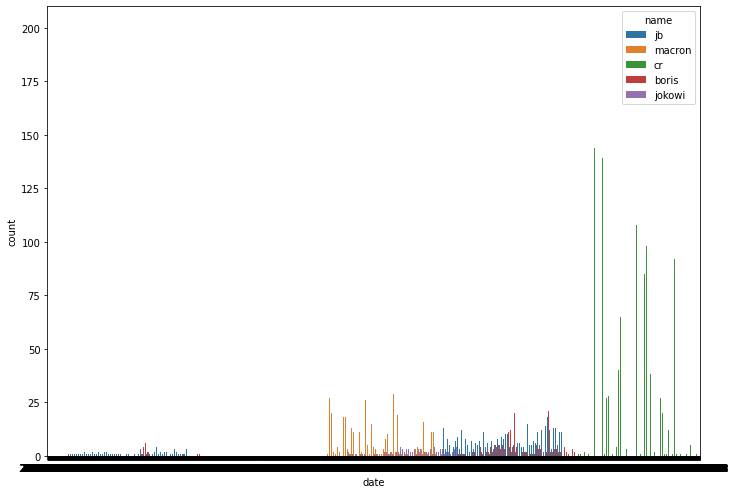

In [16]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.countplot(x='date',ax=ax, data=pres, hue = 'name')
# # plt.ylim((0,10))
# # plt.xticks([pres.date.min(), pres.date.max()], ['2010-04-01 01:33:17+0000', '2022-03-23 19:16:49+0000'])
# # plt.yticks([0, 5, 10], ['0', '5', '10'])

In [26]:
#sns.lineplot(data=pres, x = pres.date, y = pres.objectivity, hue= pres.name, palette="tab10", linewidth=2.5)

## Preparation of a new dataframe for the coming plots

In [18]:
pres_obj_pol = pres.groupby(['date', 'name'], as_index=False).mean()


In [19]:
pres_obj_pol['date'] = pres_obj_pol['date'].apply(lambda x: x.strftime('%B-%Y'))
pres_obj_pol = pres_obj_pol.groupby(['date', 'name'], as_index=False).mean()

In [20]:
pres_obj_pol.describe()

,date,name,id,cashtags,polarity,objectivity
0,April-2010,jb,1.214037e+10,NaN,-0.011951,0.200862
1,April-2013,jb,3.227765e+17,NaN,-0.026261,0.252527
2,April-2014,jb,4.561191e+17,NaN,0.009921,0.093254
3,April-2015,boris,5.882357e+17,NaN,0.244985,0.436661
4,April-2015,jb,5.884409e+17,NaN,0.054451,0.226371


## Plot of mean objectivity per month per politician

([<matplotlib.axis.XTick at 0x7fb9725a6670>,
 [Text(0.0, 0, 'April-2010'),
  Text(40.0, 0, 'January-2013'),
  Text(60.0, 0, 'July-2021'),
  Text(119.0, 0, 'September-2021')])

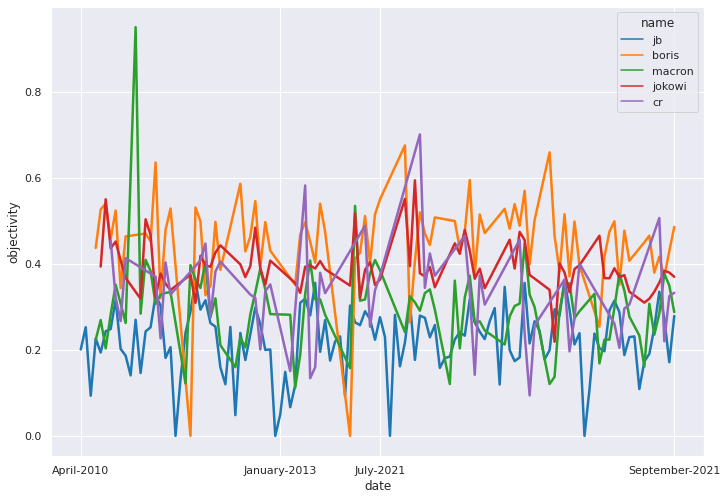

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=pres_obj_pol, x = pres_obj_pol.date, y = pres_obj_pol.objectivity, hue= pres_obj_pol.name, palette="tab10", linewidth=2.5)
plt.xticks([pres_obj_pol.date.min(),pres_obj_pol.date[len(pres_obj_pol.date)//3], pres_obj_pol.date[len(pres_obj_pol.date)//2], pres_obj_pol.date.max()], [f'{pres_obj_pol.date.min()}', f'{pres_obj_pol.date[len(pres_obj_pol.date)//3]}', f'{pres_obj_pol.date[len(pres_obj_pol.date)//2]}',f'{pres_obj_pol.date.max()}'])

## Plot of mean polarity per month per politician

([<matplotlib.axis.XTick at 0x7fb9672eb8b0>,
 [Text(0.0, 0, 'April-2010'),
  Text(40.0, 0, 'January-2013'),
  Text(60.0, 0, 'July-2021'),
  Text(119.0, 0, 'September-2021')])

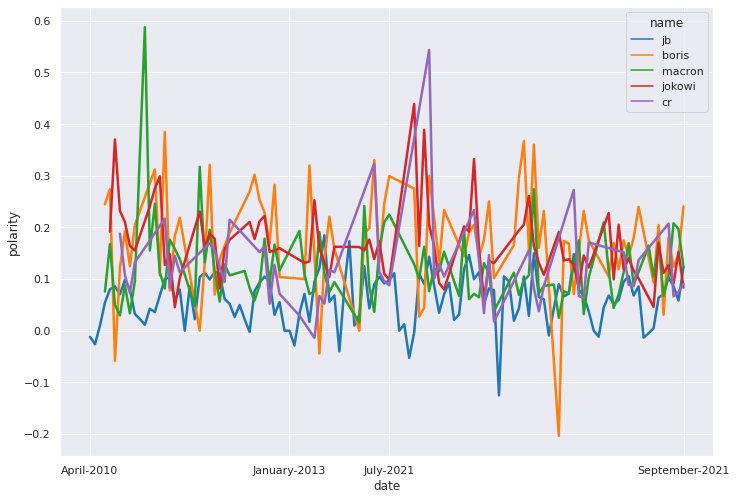

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=pres_obj_pol, x = pres_obj_pol.date, y = pres_obj_pol.polarity, hue= pres_obj_pol.name, palette="tab10", linewidth=2.5)
plt.xticks([pres_obj_pol.date.min(),pres_obj_pol.date[len(pres_obj_pol.date)//3], pres_obj_pol.date[len(pres_obj_pol.date)//2], pres_obj_pol.date.max()], [f'{pres_obj_pol.date.min()}', f'{pres_obj_pol.date[len(pres_obj_pol.date)//3]}', f'{pres_obj_pol.date[len(pres_obj_pol.date)//2]}',f'{pres_obj_pol.date.max()}'])

## Plot of mean of polarity multiplied by objectivity per month per politician

In [23]:
highlight_macron = pres_obj_pol.loc[(pres_obj_pol['name'] == 'macron') & (pres_obj_pol['objectivity'] == pres_obj_pol['objectivity'].max()),['date']]

In [24]:
highlight_macron['date'][36]

'August-2014'

([<matplotlib.axis.XTick at 0x7fb9725529a0>,
 [Text(0.0, 0, 'April-2010'),
  Text(11.0, 0, 'August-2014'),
  Text(40.0, 0, 'January-2013'),
  Text(60.0, 0, 'July-2021'),
  Text(119.0, 0, 'September-2021')])

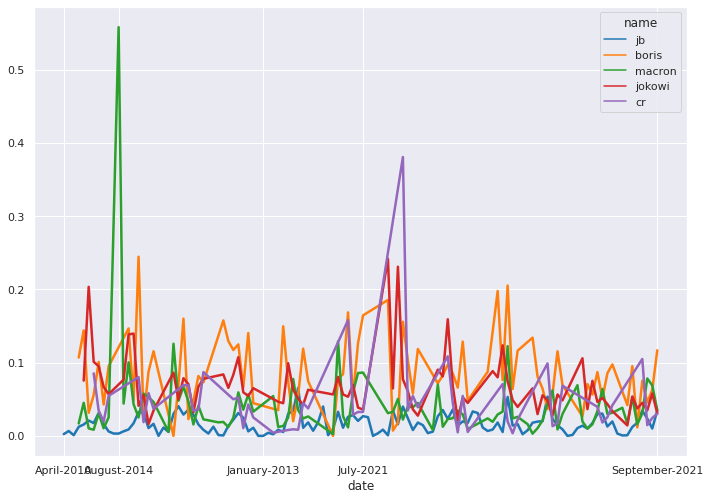

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=pres_obj_pol, x = pres_obj_pol.date, y = (abs(pres_obj_pol.polarity)*pres_obj_pol.objectivity), hue= pres_obj_pol.name, palette="tab10", linewidth=2.5)
plt.xticks([pres_obj_pol.date.min(), highlight_macron['date'][36], pres_obj_pol.date[len(pres_obj_pol.date)//3], pres_obj_pol.date[len(pres_obj_pol.date)//2], pres_obj_pol.date.max()], [f'{pres_obj_pol.date.min()}', f'{highlight_macron["date"][36]}',f'{pres_obj_pol.date[len(pres_obj_pol.date)//3]}', f'{pres_obj_pol.date[len(pres_obj_pol.date)//2]}',f'{pres_obj_pol.date.max()}'])